In [1]:
# check if in virtual environment 
!which python

/Users/kirstentempest/Private_projects/venv/bin/python


In [16]:
import sys
import requests
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract

In [28]:
# check the virtual environment, venv, is used
print(sys.executable)

/Users/kirstentempest/Private_projects/venv/bin/python


In [30]:
# download the gif
url = "https://www.quaeldich.de/qdtp/anfahrten/65_11601_gradient.gif"
with open("gradient.gif", "wb") as f: # open() function used to open file for reading or writing. wb - w: writing, b: "binary". This is crucial when working with non-text files like images, as binary mode ensures the content is written exactly as received, without any encoding conversions.
    f.write(requests.get(url).content) # request fetches the content from the given URL. .content accesses the raw content of the response, which will be the binary data of the image.
#The with statement ensures that the file will be automatically closed when you're done, even if an error occurs


In [13]:
# convert the GIF to an image 
img = Image.open("gradient.gif")
img = img.convert("RGB")  # Convert to standard format
img.save("gradient.png")  # Optional: save as PNG

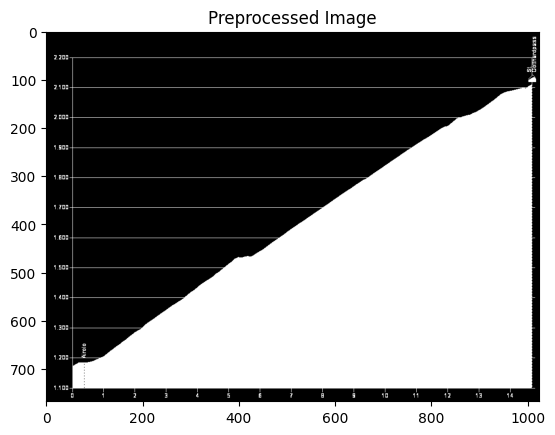

In [52]:
# preprocess the image 
image = cv2.imread("gradient.png") #  loads the image into a NumPy array, where the image's pixel values are stored. The result is a matrix (array) representing the image, which can be manipulated in Python
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Optional: thresholding for better edge detection
_, thresh = cv2.threshold(gray, 254, 255, cv2.THRESH_BINARY_INV) # Thresholding is a technique used to convert an image to a binary (black-and-white) image based on pixel intensity values.
# 1st number is the threshold value. Any pixel value above this will be turned into the 2nd number (white), and any pixel value below this will be turned into 0 (black), depending on the flag provided.
# THRESH_BINARY_INV: this flag indicates inverted binary thresholding

plt.imshow(thresh, cmap="gray")
plt.title("Preprocessed Image")
plt.show()

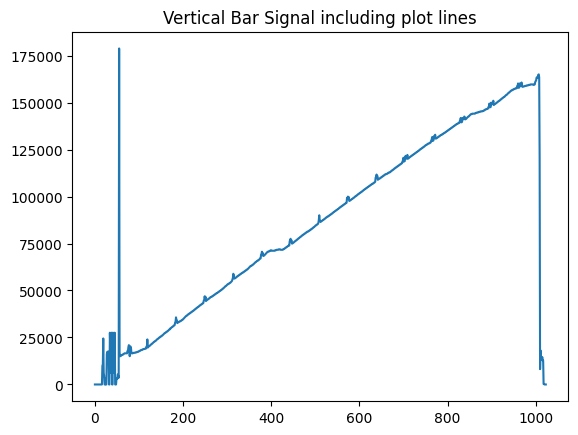

In [66]:
# Extract the bars (heights and positions) - sum pixels along vertical axis to find bar heights
bar_data = np.sum(thresh, axis=0)  # sums the columns 
plt.plot(bar_data)
plt.title("Vertical Bar Signal including plot lines")
plt.show()

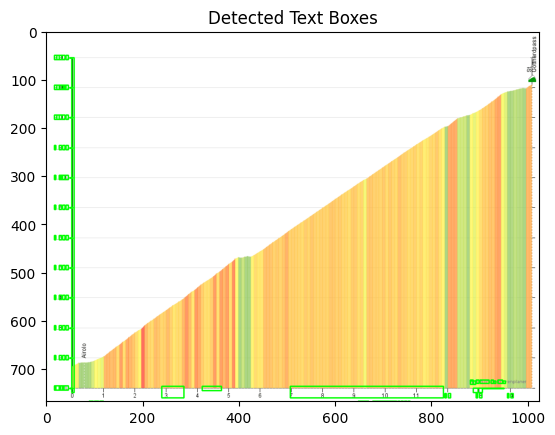

In [82]:
# performing text detection on an image using Tesseract OCR
boxes = pytesseract.image_to_boxes(image) # returns the bounding boxes around individual characters it detects. # Output: <character> <x1> <y1> <x2> <y2> <page>
for b in boxes.splitlines(): # split the boxes output onto seperate lines for each box 
    b = b.split() # split each line up
  #  print(b[0]) # prints the character detected 
    x, y, w, h = map(int, b[1:5]) # converts strings to integers
    cv2.rectangle(image, (x, image.shape[0]-y), (w, image.shape[0]-h), (0, 255, 0), 2) # draws a rectangle on the image for each text box detected. 
    # OpenCV uses top-left as the origin (0,0), but Tesseract uses bottom-left, so we flip the y-coordinates by subtracting from image.shape[0] (image height)
    # (0, 255, 0) sets the rectangle color to green (BGR format)
    # last number is the thickness of the lines

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # matplotlib expects RGB
plt.title("Detected Text Boxes")
plt.show()

# Problem: doesn't detect words, only letters, numbers or characters. 


text data =    
text data =   
text data =   
text data =   
text data =   
text data =   
text data =  


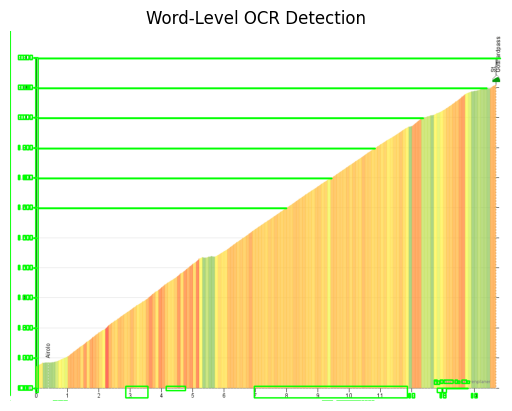

In [98]:
# Read and preprocess image text
# Run OCR with word-level output
data = pytesseract.image_to_data(gray, output_type=pytesseract.Output.DICT) # image_to_data function returns detailed info about each word:
# The word itself,
# Its location on the image (left, top, width, height),
# The OCR confidence

# Draw boxes around each detected word
for i in range(len(data["text"])):
    if int(data["conf"][i]) > 60:  # Filter low-confidence results
        x, y, w, h = data["left"][i], data["top"][i], data["width"][i], data["height"][i]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2) # draws a rectangle on the image for each text box detected. 
    # OpenCV uses top-left as the origin (0,0), but Tesseract uses bottom-left, so we flip the y-coordinates by subtracting from image.shape[0] (image height)
    # (0, 255, 0) sets the rectangle color to green (BGR format)
    # last number is the thickness of the lines
        print('text data = ', data["text"][i])
        cv2.putText(image, data["text"][i], (x, y - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

# Display image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Word-Level OCR Detection")
plt.axis("off")
plt.show()

# Problem: text not detected properly using this method. Not sure why. 


In [26]:
# # for later
# # recreate the plot 
# plt.bar(distances, elevations, color="orange")
# for i, label in enumerate(place_names):
#     plt.text(distances[i], elevations[i]+10, label, ha='center')
# plt.xlabel("Distance (km)")
# plt.ylabel("Elevation (m)")
# plt.title("Recreated Gradient Profile")
# plt.show()

NameError: name 'distances' is not defined